# 1: UNDERSTAND THE PROBLEM STATEMENT

- Predicting Ice Creams sales to prdict daily revenue based on outside temperature

# 2: IMPORT LIBRARIES AND DATASETS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#from jupyterthemes import jtplot

#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [4]:
sales_df = pd.read_csv('IceCreamData.csv')

In [5]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [6]:
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [7]:
sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [10]:
sales_df.mean()

Temperature     22.232225
Revenue        521.570777
dtype: float64

In [11]:
sales_df.max()

Temperature      45.0
Revenue        1000.0
dtype: float64

# 3: PERFORM DATA VISUALIZATION

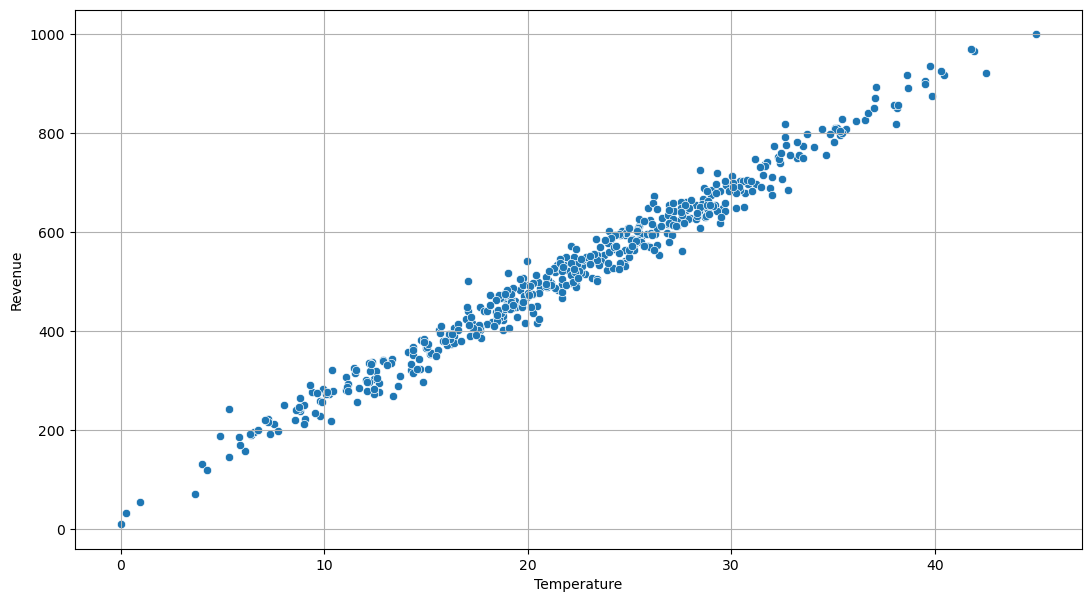

In [12]:
#using seaborn for graphing temp and revenue
plt.figure(figsize=(13,7))
#scatterplot
sns.scatterplot(x='Temperature',y='Revenue',data=sales_df)
#add grid
plt.grid()

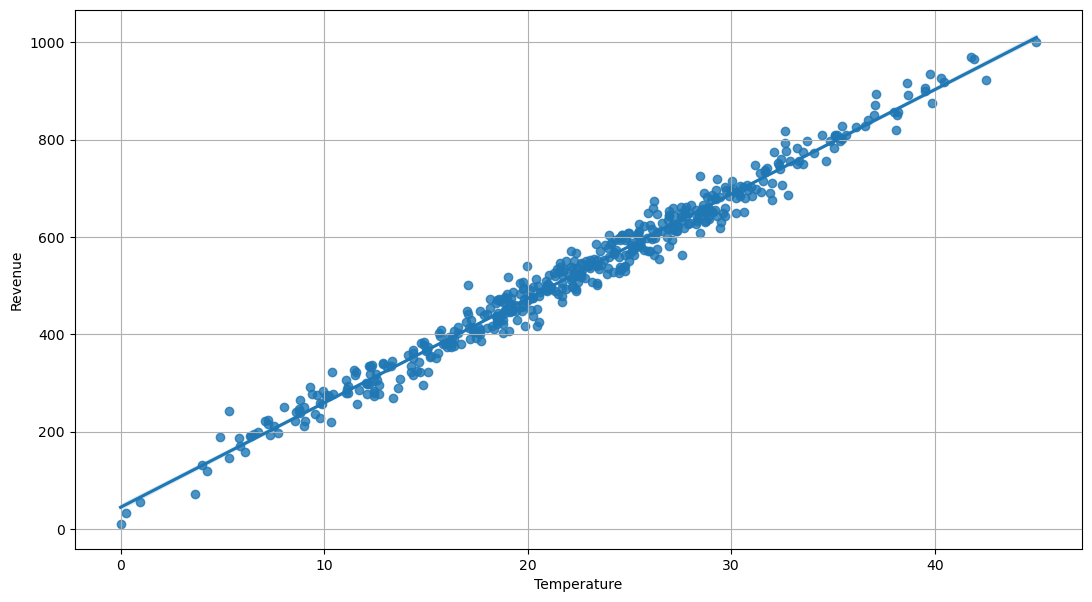

In [13]:
#regression plot- adding the best fitline through the plot
plt.figure(figsize=(13,7))
sns.regplot(x='Temperature',y='Revenue',data=sales_df)
plt.grid()

# 4: CREATE TESTING AND TRAINING DATASET

In [14]:
#Input-Independent variable
X=sales_df['Temperature']
#Output-Dependent Variable
y=sales_df['Revenue']

In [15]:
#Converting X,y to numpy arrays - for further train test split
X=np.array(X)
print(X.shape)

y=np.array(y)

(500,)


In [16]:
# reshaping the array from (500,) to (500, 1) - for further implementing train test split
X = X.reshape(-1,1)
print(X.shape)

# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
print(y.shape)

(500, 1)
(500, 1)


In [17]:
#sci kit lear - tarin -test split for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [18]:
X_train.shape

(400, 1)

In [19]:
y_train.shape

(400, 1)

In [20]:
X_test.shape

(100, 1)

In [21]:
y_test.shape

(100, 1)

# 5: TRAIN A SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

In [24]:
#importing linearregression class
from sklearn.linear_model import LinearRegression

#instanciating object of the instanciated class
MyModel = LinearRegression(fit_intercept=True)
#calling the fit function and adding the independent and dependent variables
MyModel.fit(X_train,y_train)

LinearRegression()

In [25]:
# y =mx+b
# m
print('Linear Model Coeff(m) ',MyModel.coef_)
print('Linear Model Coeff(b) ',MyModel.intercept_)

Linear Model Coeff(m)  [[21.34685554]]
Linear Model Coeff(b)  [47.48611322]


In [26]:
from sklearn.linear_model import LinearRegression


In [27]:
print('Linear Model Coeff(m)', MyModel.coef_)
print('Linear Model Coeff(b)', MyModel.intercept_)

Linear Model Coeff(m) [[21.34685554]]
Linear Model Coeff(b) [47.48611322]


# 6: EVALUATE TRAINED SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

Text(0.5, 0, 'Temperature [C]')

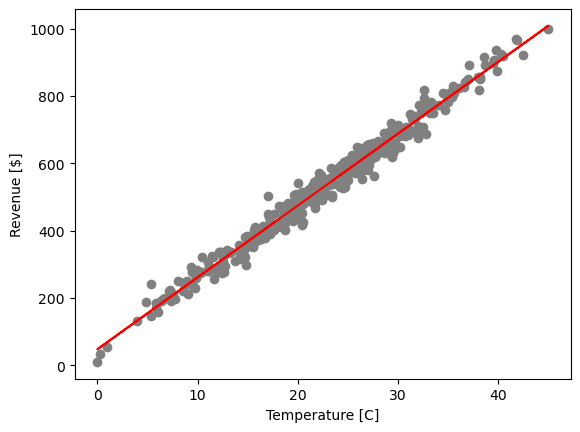

In [28]:
#plotting scatter plot of trqain data
plt.scatter(X_train, y_train, color='grey')

#plotting regression line with slr
plt.plot(X_train, MyModel.predict(X_train), color='r')

plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [C]')



In [29]:
#Calculating model accuracy
accuracy_LinearRegression = MyModel.score(X_test, y_test)
accuracy_LinearRegression

0.9710138952579231

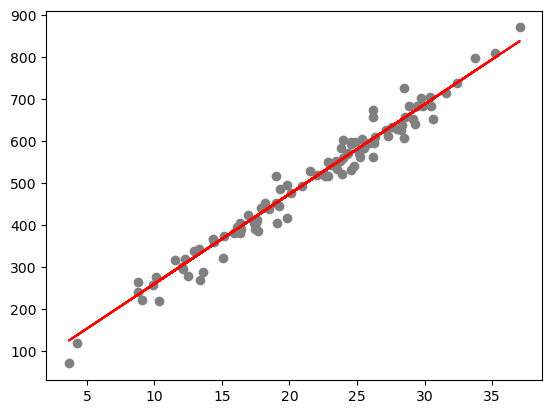

In [30]:
plt.scatter(X_test,  y_test, color='grey')
plt.plot(X_test, MyModel.predict(X_test),color='r')

In [31]:
# Use the trained model to generate predictions
#add temp in array
Temp = np.array([20])
#reshape array
Temp = Temp.reshape(-1,1)

Revenue =MyModel.predict(Temp)
print('Revenue Predictions =', Revenue)


Revenue Predictions = [[474.42322403]]
